# Fake News Detection Project

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv

This run for offline Dataset

In [31]:
import csv

filename = "fake-news-dataset.csv"

# Open the file with the correct encoding
with open(filename, 'r', encoding='utf-8') as dataset:
    dataset_reader = csv.reader(dataset)
    
    # Set new field size limit
    csv.field_size_limit(1000000)
    
    # Convert to list
    dataset_list = list(dataset_reader)
    
    # Remove index column
    dataset_list = [row[1:] for row in dataset_list]
    
    print(dataset_list[0])


['title', 'text', 'label']


This for online Dataset

In [ ]:
# # Download
# !curl "https://gitlab.com/atlonxp/siit-nlp/-/raw/main/dl-rnn/fake-new-dataset.zip?ref_type=heads&inline=false" --output "fake-news.zip"

# # Extract
# import zipfile
# with zipfile.ZipFile('fake-news.zip','r') as zip_ref:
#   zip_ref.extractall()

# filename = "fake-news-dataset.csv"
# dataset = open(filename, 'r')
# dataset_reader = csv.reader(dataset)

# # Set new field size limit
# csv.field_size_limit(1000000)

# # Convert to list
# dataset_list = list(dataset_reader)

# #Remove index column
# dataset_list = [row[1:] for row in dataset_list]
# print(dataset_list[0])

In [32]:
df = pd.DataFrame(dataset_list[1:6], columns=dataset_list[0])

In [33]:
#Remove index column
dataset_list = [row[0:] for row in dataset_list]
print(dataset_list[0])
df = pd.DataFrame(dataset_list[1:], columns=dataset_list[0]) # Use all rows for the DataFrame

# Check for NaN values
nan_values = df.isnull().sum()
print("\nNaN values per column:\n", nan_values)

#Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
print("\nDuplicate rows:\n", df[df.duplicated()])


['title', 'text', 'label']

NaN values per column:
 title    0
text     0
label    0
dtype: int64

Number of duplicate rows: 8456

Duplicate rows:
                                                    title  \
873    Just Weeks After Obama’s Executive Order on Ca...   
1192   Sports Bar Owner Bans NFL Games…Will Show Only...   
1508   HILARIOUS! LIBERALS STUNNED When Republican Gu...   
1632   Strange: Trump ‘Internet Takeover’ Fear Story ...   
1661   WOW! HILLARY Took State Department Furniture T...   
...                                                  ...   
72116  SAY “HELLO” TO YOUR NEW NEIGHBORS! Clooney Beg...   
72118  LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...   
72125  WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...   
72128  JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...   
72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text label  
873    By Melissa Dykes This has already been the cra...     1  
1

In [34]:
# prompt: drop nan values and duplicate

# Drop NaN values
df_cleaned = df.dropna()

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Print the cleaned DataFrame
print("\nCleaned DataFrame:\n", df_cleaned)


Cleaned DataFrame:
                                                    title  \
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                          
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3      Bobby Jindal, raised Hindu, uses story of Chri...   
4      SATAN 2: Russia unvelis an image of its terrif...   
...                                                  ...   
72127  WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...   
72129  Russians steal research on Trump in hack of U....   
72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132  Trump tussle gives unpopular Mexican leader mu...   

                                                    text label  
0      No comment is expected from Barack Obama Membe...     1  
1         Did they post their votes for Hillary already?     1  
2       Now, most of the demonstrators gathered last ...     1 

In [35]:
# Assuming df_cleaned is your cleaned DataFrame from the previous code
# If not, replace df_cleaned with your actual DataFrame

label_distribution = df_cleaned['label'].value_counts(normalize=True) * 100
print("\nDistribution of labels:\n", label_distribution)


Distribution of labels:
 label
0    54.635824
1    45.364176
Name: proportion, dtype: float64


In [36]:
df_cleaned.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [37]:
# Combine 'title' and 'text' columns
df_cleaned['title'] = df_cleaned['title'] + ' ' + df_cleaned['text']
df_cleaned = df_cleaned.drop(columns=['text'])
# Display the updated DataFrame
print("\nDataFrame with combined text:\n", df_cleaned)


DataFrame with combined text:
                                                    title label
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...     1
1         Did they post their votes for Hillary already?     1
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...     1
3      Bobby Jindal, raised Hindu, uses story of Chri...     0
4      SATAN 2: Russia unvelis an image of its terrif...     1
...                                                  ...   ...
72127  WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...     1
72129  Russians steal research on Trump in hack of U....     0
72130   WATCH: Giuliani Demands That Democrats Apolog...     1
72131  Migrants Refuse To Leave Train At Refugee Camp...     0
72132  Trump tussle gives unpopular Mexican leader mu...     0

[63678 rows x 2 columns]


In [38]:
df_cleaned

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
...,...,...
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,1
72129,Russians steal research on Trump in hack of U....,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0


In [39]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MoaZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MoaZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MoaZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import nltk
nltk.data.path.append("C:/Users/MoaZ/AppData/Roaming/nltk_data")

In [46]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download NLTK resources (only required once)
nltk.download('stopwords')
nltk.download('punkt_tab') # Download 'punkt_tab' instead of 'punkt'

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def preprocess_text(text):
    # Clean text (remove URLs, special characters, numbers, etc.)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Rejoin tokens into a single string
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'text' column (or combined column)
df_cleaned['processed_text'] = df_cleaned['title'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MoaZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MoaZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [47]:
# Tokenization and padding
vocab_size = 20000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df_cleaned['title'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df_cleaned['title'])

# Set the maximum sequence length for padding
max_sequence_length = 200

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Update the dataframe with padded sequences (if needed)
df_cleaned['padded_sequences'] = list(padded_sequences)

# Save the tokenizer for future use (if needed for deployment)
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [50]:
# prompt: Split the dataset into training, validation, and test sets.

from sklearn.model_selection import train_test_split

# Assuming 'df_cleaned' and 'padded_sequences' are defined from the previous code

# Separate features (X) and labels (y)
X = padded_sequences
y = df_cleaned['label'].values

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44574, 200)
y_train shape: (44574,)
X_val shape: (9552, 200)
y_val shape: (9552,)
X_test shape: (9552, 200)
y_test shape: (9552,)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

vocab_size = 20000  # Same as tokenizer's num_words
embedding_dim = 100
max_len = 200  # Same as padding length

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\MoaZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Convert labels to numerical values
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int) # Convert y_test as well for consistency

# Now proceed with model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/10
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 134s 95ms/step - accuracy: 0.7275 - loss: 0.5420 - val_accuracy: 0.5953 - val_loss: 0.6854
Epoch 2/10
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 133s 96ms/step - accuracy: 0.7760 - loss: 0.4760 - val_accuracy: 0.9341 - val_loss: 0.1752
Epoch 3/10
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 136s 98ms/step - accuracy: 0.9555 - loss: 0.1361 - val_accuracy: 0.9673 - val_loss: 0.0895
Epoch 4/10
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 122s 88ms/step - accuracy: 0.9844 - loss: 0.0508 - val_accuracy: 0.9696 - val_loss: 0.0948
Epoch 5/10
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 122s 87ms/step - accuracy: 0.9942 - loss: 0.0227 - val_accuracy: 0.9673 - val_loss: 0.1134
Epoch 6/10
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 120s 86ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9577 - val_loss: 0.1517


In [53]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


299/299 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9680 - loss: 0.0915
Test Loss: 0.09276276081800461
Test Accuracy: 0.9676507711410522


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


299/299 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
              precision    recall  f1-score   support

        Fake       0.97      0.97      0.97      5206
        Real       0.96      0.96      0.96      4346

    accuracy                           0.97      9552
   macro avg       0.97      0.97      0.97      9552
weighted avg       0.97      0.97      0.97      9552

Confusion Matrix:
 [[5054  152]
 [ 157 4189]]


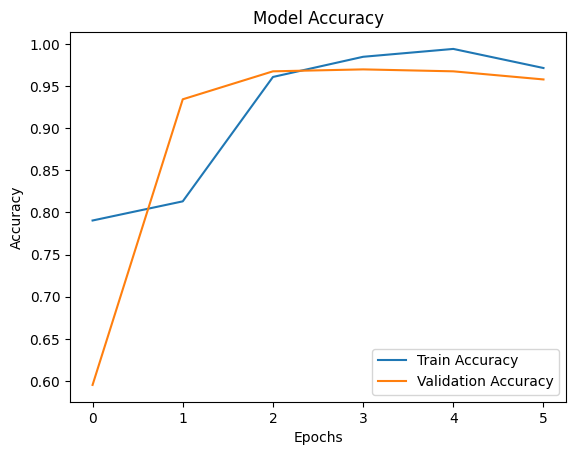

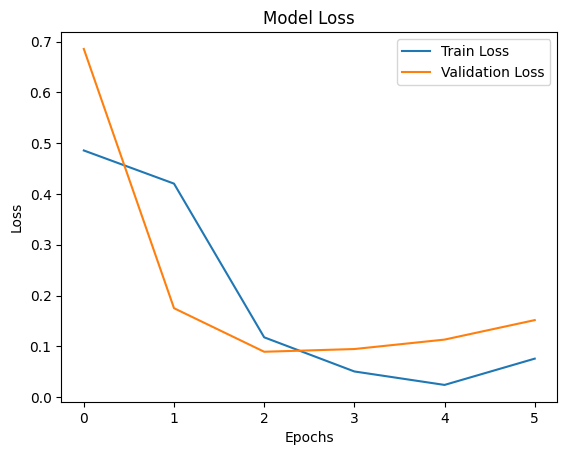

In [56]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


299/299 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


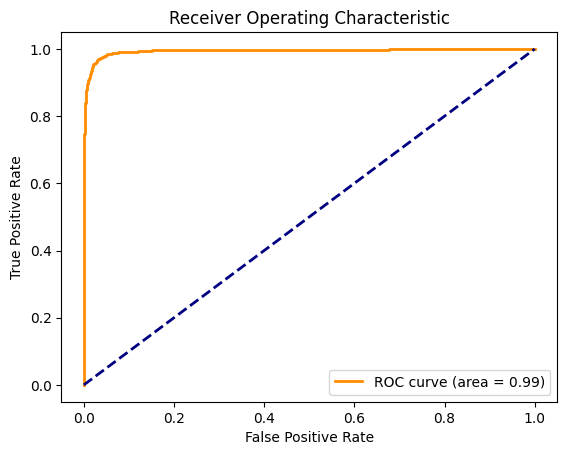

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [57]:
# Save the entire model
model.save('fake_news_lstm_model.h5')

# Save the tokenizer
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved successfully!")

Model and tokenizer saved successfully!
